In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.3.0


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [22]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

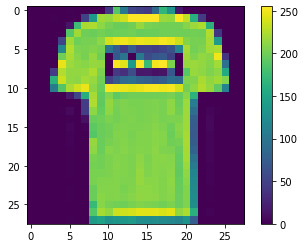

In [20]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images / 255.0
test_images = test_images / 255.0

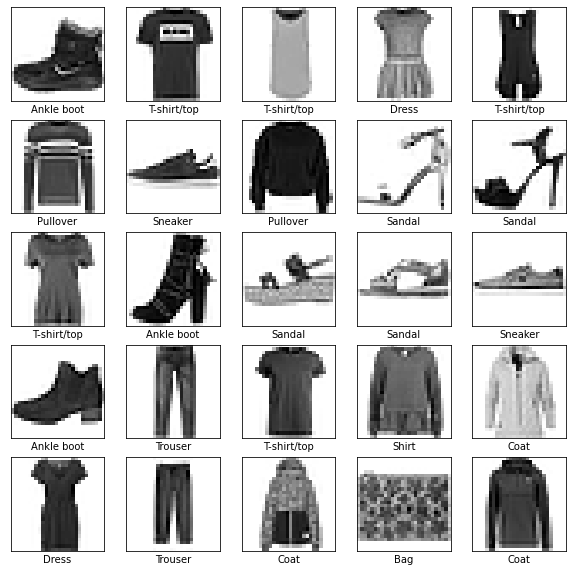

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.fit(train_images,train_labels,epochs=11)

Epoch 1/11
1875/1875 [==============================] - 1s 633us/step - loss: 0.2292 - accuracy: 0.9135
Epoch 2/11
1875/1875 [==============================] - 1s 613us/step - loss: 0.2237 - accuracy: 0.9166
Epoch 3/11
1875/1875 [==============================] - 1s 607us/step - loss: 0.2152 - accuracy: 0.9188
Epoch 4/11
1875/1875 [==============================] - 1s 605us/step - loss: 0.2103 - accuracy: 0.9203
Epoch 5/11
1875/1875 [==============================] - 1s 607us/step - loss: 0.2042 - accuracy: 0.9234
Epoch 6/11
1875/1875 [==============================] - 1s 638us/step - loss: 0.1977 - accuracy: 0.9250
Epoch 7/11
1875/1875 [==============================] - 1s 620us/step - loss: 0.1921 - accuracy: 0.9280
Epoch 8/11
1875/1875 [==============================] - 1s 607us/step - loss: 0.1871 - accuracy: 0.9300
Epoch 9/11
1875/1875 [==============================] - 1s 604us/step - loss: 0.1825 - accuracy: 0.9316
Epoch 10/11
1875/1875 [==============================] - 1s 620u

In [35]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)

313/313 - 0s - loss: 0.3648 - accuracy: 0.8878


In [36]:
test_acc

0.8877999782562256

In [37]:
test_loss

0.3647992014884949

In [39]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [41]:
predictions = probability_model.predict(test_images)

In [47]:
predictions[0]

array([1.5265698e-11, 1.8947901e-16, 4.0408930e-14, 3.4206793e-19,
       2.3133703e-14, 3.4861935e-06, 1.7978598e-12, 9.6322462e-04,
       4.5101332e-11, 9.9903333e-01], dtype=float32)

In [48]:
np.argmax(predictions[0])

9

In [49]:
test_labels[0]

9

In [52]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

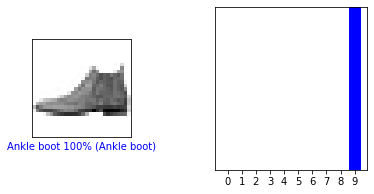

In [53]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,3,1)
plot_image(i,predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

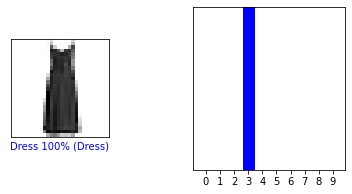

In [56]:
i = 13
plt.figure(figsize=(6,3))
plt.subplot(1,3,1)
plot_image(i,predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

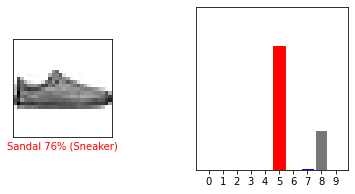

In [59]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,3,1)
plot_image(i,predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

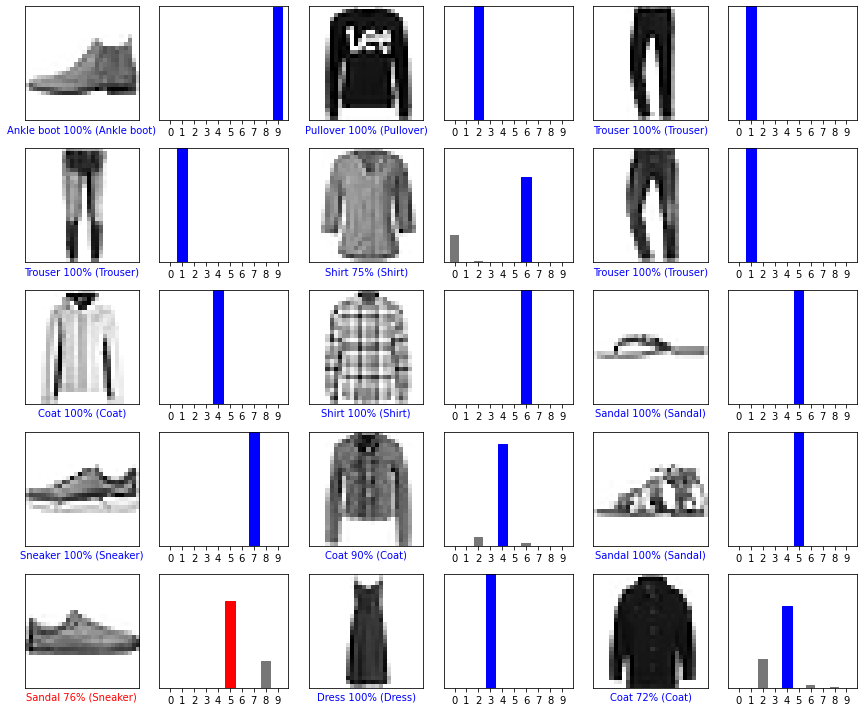

In [64]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [65]:
img = test_images[1]

In [66]:
img.shape

(28, 28)

In [67]:
img = (np.expand_dims(img,0))

In [68]:
img.shape

(1, 28, 28)

In [69]:
predictions_single = probability_model.predict(img)

In [70]:
predictions_single

array([[1.1974673e-04, 3.3804201e-17, 9.9944955e-01, 7.9862272e-13,
        2.5472839e-04, 1.7116930e-13, 1.7599076e-04, 3.4584793e-21,
        3.2728449e-12, 2.5519659e-14]], dtype=float32)

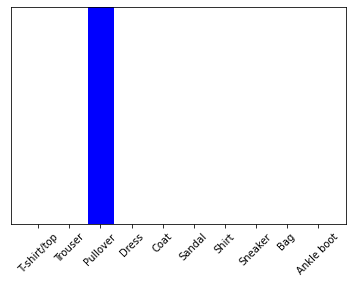

In [71]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [72]:
np.argmax(predictions_single[0])

2